### MACS 30200 - Problem Set  \#4
----
Tom Curran

May 28th, 2018


1. ** Discrete approximation of AR(1) process (10 points). **

Assume that a random variable evolves according to the following continuous AR(1) process,

$$  z_{t+1} = \rho z_t + (1 -\rho)\mu + \epsilon_t \ \ s.t. \in (-1,1) \ and \ \epsilon \sim N(0, \sigma)$$

where $\rho$ governs the persistence of the process, $\mu$ is the long-run average of $z_t$, and $\sigma$ is the standard deviation of the normally distributed error terms. Assume that $\rho$ = 0.85, $\mu$ = 11.4, and $\sigma$ = 0.7.

a. Assume that $z_0 = μ$. Simulate a time series of T = 500 periods of values of
$\{zt\}^T_{t=1}$ using (1) by drawing a vector of T values from the normal N(0,σ)
above using the following code (so that all your vectors are the same). Plot
the first 100 observations of the resulting simulated time series for ${z_t}^{100}_{t=1}$
(Reminder: I want you to plot the $z_t$’s, not the $\epsilon_t$’s.)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

In [58]:
rho = .85
mu = 11.4
T = 500
sigma = 0.7

unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
                           random_state=25)

eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [71]:
#create the zeroeth z value which is equal to mu

z = np.zeros(T)

z[0] = mu

for i in range(1, T):
    z[i] = rho * z[i - 1] + (1 - rho)*mu + eps_vec[i]
    #print(z[i])

Text(0.5,1,'First 100 Observations of Simulated Time Series')

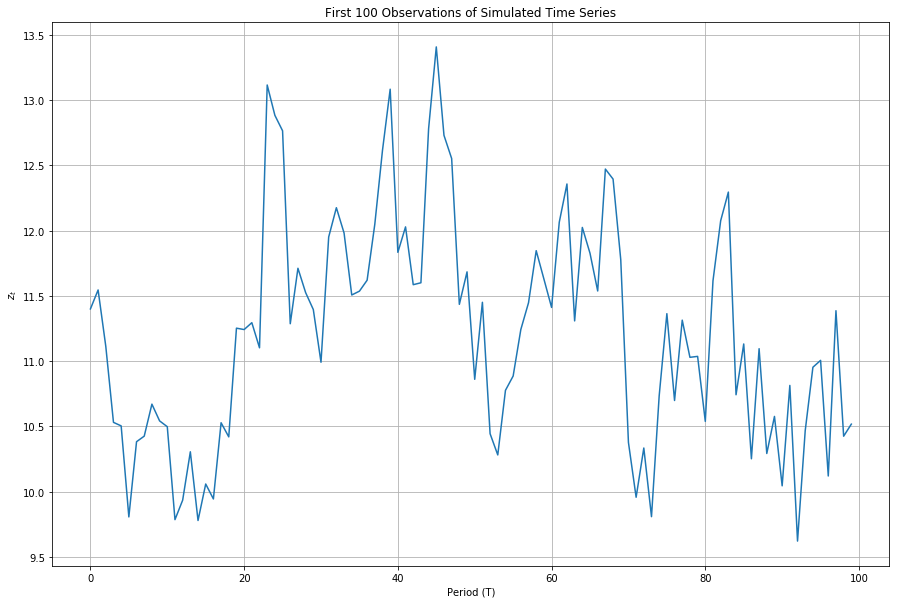

In [72]:
z100 = z[:100]
plt.figure(figsize = (15,10))
plt.plot(np.arange(0,100), z100, "-")
plt.grid()
plt.ylabel("$z_t$")
plt.xlabel("Period (T)")
plt.title("First 100 Observations of Simulated Time Series")

b) Create a 5-element vector called z vals that represents a discretized version of all the values that $z_t$ can take on. Let `z_vals` be 5 evenly spaced points between $\mu−3\sigma$ and $\mu+3\sigma$. The third element of this vector z_vals\[2] should equal $\mu$. This vector should nearly span all of the values that zt takes on in the time series from part (a).

In [73]:
min = mu - 3*sigma 

max = mu + 3*sigma

z_vals = np.linspace(min, max, num = 5)

print("The third value of z_vals is equal to mu: ", z_vals[2] == mu)
print("z_vals: ",z_vals)


The third value of z_vals is equal to mu:  True
z_vals:  [  9.3   10.35  11.4   12.45  13.5 ]


d)Estimate the probabilities of a 5 × 5 Markov transition matrix $\hat P$:

In [74]:
z_cuts = .5 * z_vals[:-1] + .5 * z_vals[1:]
z_cuts

array([  9.825,  10.875,  11.925,  12.975])

In [75]:
z_bins = np.zeros([len(z)])

for i in range(0, len(z)):
    if z[i] < z_cuts[0]:
        z_bins[i] = 0
    elif z_cuts[0] < z[i] and z[i] <= z_cuts[1]:
        z_bins[i] = 1
    elif z_cuts[1] < z[i] and z[i] <= z_cuts[2]:
        z_bins[i] = 2
    elif z_cuts[2] < z[i] and z[i] <= z_cuts[3]:
        z_bins[i] = 3
    elif z[i] > z_cuts[3]:
        z_bins[i] = 4
z_bins

array([ 2.,  2.,  2.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  4.,  3.,  3.,
        2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  2.,  2.,  2.,  3.,  3.,
        4.,  2.,  3.,  2.,  2.,  3.,  4.,  3.,  3.,  2.,  2.,  1.,  2.,
        1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  2.,  3.,
        2.,  2.,  3.,  3.,  2.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  2.,
        2.,  2.,  1.,  2.,  3.,  3.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,
        1.,  0.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,
        2.,  1.,  1.,  1.,  3.,  3.,  3.,  3.,  3.,  2.,  3.,  2.,  2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        3.,  2.,  4.,  3.,  3.,  3.,  2.,  3.,  4.,  4.,  3.,  4.,  4.,
        3.,  2.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,
        3.,  1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  2.,  3.,  2.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1

In [76]:
p_hat = np.zeros([5,5], dtype = int)
p_hat

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [77]:
for i in range(0,len(z)-1):
    current_bin = int(z_bins[i])
    next_bin = int(z_bins[i+1])
    
    p_hat[current_bin, next_bin] += 1
print(p_hat)

[[34 16  2  0  0]
 [14 64 38  4  0]
 [ 5 35 79 37  6]
 [ 0  5 40 59 13]
 [ 0  0  2 17 29]]


In [78]:
p_hat_colsums = p_hat.sum(axis = 1).reshape(5,1)

p_hat2 = p_hat / p_hat_colsums

In [79]:
print(p_hat2)

[[ 0.65384615  0.30769231  0.03846154  0.          0.        ]
 [ 0.11666667  0.53333333  0.31666667  0.03333333  0.        ]
 [ 0.0308642   0.21604938  0.48765432  0.22839506  0.03703704]
 [ 0.          0.04273504  0.34188034  0.5042735   0.11111111]
 [ 0.          0.          0.04166667  0.35416667  0.60416667]]


d) According to your estimated Markov transition matrix $\hat P$ from part (c), what is the probability of $z_{t+3}$ being in bin 5 ($z_{t+3}$ > z_cuts\[3]) given that $z_t$ is in bin 3 (z_cuts\[1] < $z_t$ ≤ z_cuts\[2]) today? (Hint: Start with a vector \[0, 0, 1, 0, 0].)

In [80]:
import  numpy.linalg as LA

current = np.zeros(5).reshape(5,1)
current[2] = 1

In [81]:
est_bin5 = np.dot(LA.matrix_power(p_hat2.T, 3), current)
print(est_bin5)
print("The probability of being in bin 5 given that $z_t$ is in bin 3 today is {}%".format(round(est_bin5.item(4)*100,2)))

[[ 0.07944368]
 [ 0.24068023]
 [ 0.35415654]
 [ 0.24419158]
 [ 0.08152798]]
The probability of being in bin 5 given that $z_t$ is in bin 3 today is 8.15%


e) According to your estimated Markov transition matrix $\hat P$ from part (c), what is the stationary (long-run, ergodic) distribution of $z_t$ (i.e., the percentages of the time that the random variable spends in each of the 5 bins)?

In [82]:
import numpy.linalg as LA

eigvals, eigvecmat = LA.eig(p_hat2.T)
print("Eigen Values: ")
print(eigvals)

print("-------------------------------------------------------------------------------------")
print("Eigen Vector Matrix:")
print(eigvecmat)
print("-------------------------------------------------------------------------------------")
eigvec = eigvecmat[:, 0] / eigvecmat[:, 0].sum()
print(" The stationary (long-run ergodic) distribution of zt:",eigvec)

Eigen Values: 
[ 1.          0.76442731  0.5482917   0.12303173  0.34752325]
-------------------------------------------------------------------------------------
Eigen Vector Matrix:
[[-0.22673915 -0.51815898  0.47831521 -0.04068971 -0.25293242]
 [-0.49835364 -0.51254704 -0.24826485  0.3918554   0.6956439 ]
 [-0.65919     0.08095256 -0.69737987 -0.78141596 -0.11921454]
 [-0.4769282   0.54983562 -0.00512596  0.48123146 -0.60081994]
 [-0.19555318  0.39991784  0.47245546 -0.05098119  0.27732301]]
-------------------------------------------------------------------------------------
 The stationary (long-run ergodic) distribution of zt: [ 0.11024071  0.24229984  0.32049858  0.23188278  0.09507808]


Use the vector of T uniformly distributed variables in unif vec from part (a) to simulate a time series of T values of the discretized version of $z_t$ ∈ z_vals using the estimated transition matrix $\hat P$ and an initial value $z_0$ = z_vals\[2]. Plot the time series of this discretized series for zt versus the continuous version from part (a). Make sure your plot has a legend, title, and labeled axes. To be clear, your discretized time series for zt should alternate randomly among only the five values in the vector z vals. However, this time series should have many of the same properties as the continuous time series zt from part (a).

In [83]:
z_0 = z_vals[2]
z_vec = np.zeros(T)
z_t = z_0
zt_ind = 1
for t_ind in range(T):
    # Calculate new index and new value
    ztp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(p_hat2[zt_ind, :])).min()
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    
    # Update the current value and its index in the loop
    z_t = z_tp1
    zt_ind = ztp1_ind

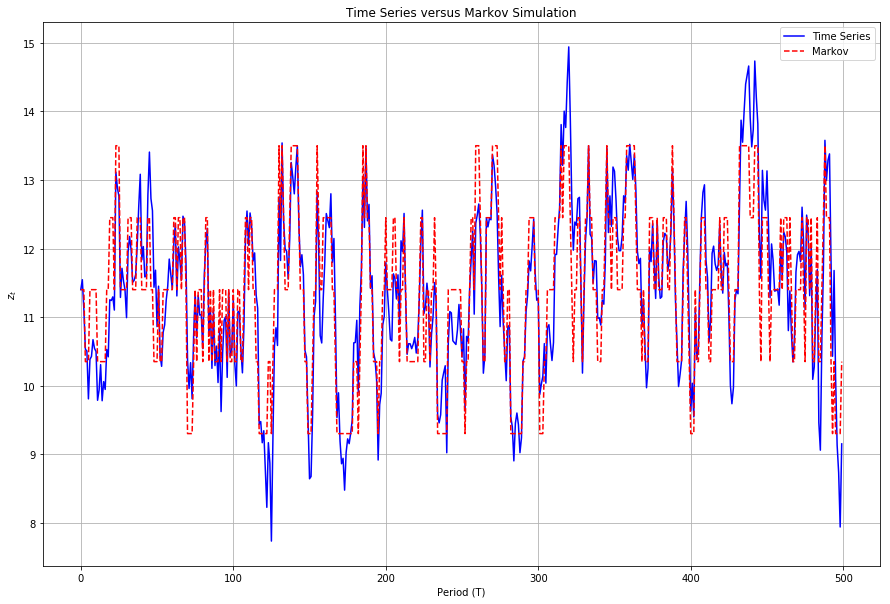

In [101]:
plt.figure(figsize=(15,10))

plt.plot(z, label = "Time Series", c = "blue")
plt.plot(z_vec, label = "Markov", linestyle = "--", c ="red")
plt.grid()
plt.ylabel("$z_t$")
plt.xlabel("Period (T)")
plt.title("Time Series versus Markov Simulation")
plt.legend()